## Visualise image-specific class saliency with backpropagation

In [1]:
import matplotlib.pyplot as plt

import torch
import torchvision.models as models

from torchscope.utils import (load_image,
                              apply_transforms,
                              denormalize,
                              normalize,
                              format_for_plotting)

from torchscope.utils import ImageNetIndex

from torchscope.saliency import Backprop

### 1. Load an image 

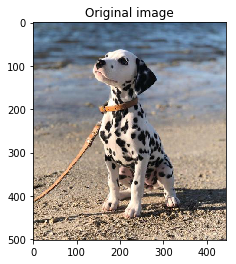

In [2]:
image = load_image('./images/dalmatian_01.jpg')

plt.imshow(image)
plt.title('Original image');

### 2. Load a pre-trained Model

In [3]:
model = models.alexnet(pretrained=True)

### 3. Create an instance of Backprop with the model

In [4]:
backprop = Backprop(model)

### 4. Calculate the gradient of a target class w.r.t the input image

In [5]:
imagenet = ImageNetIndex()
target_class = imagenet['dalmatian']

input_ = apply_transforms(image)

gradient = backprop.calculate_gradient(input_, target_class)

### 5. Visualise side-by-side

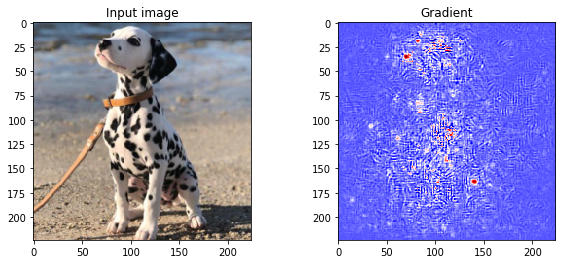

In [6]:
fig = plt.figure(figsize=(10, 4))

input_image = format_for_plotting(denormalize(input_))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input_image)
ax.set_title('Input image')

formatted_gradient = format_for_plotting(normalize(gradient))
ax = fig.add_subplot(1, 2, 2)
ax.imshow(formatted_gradient, cmap='seismic')
ax.set_title('Gradient');

### 6. Visualise as an overlay

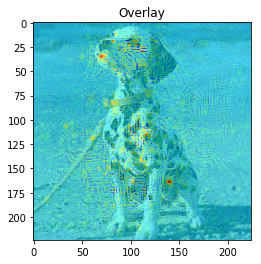

In [7]:
plt.imshow(input_image, cmap='gray')
plt.imshow(formatted_gradient, cmap='jet', alpha=0.6)
plt.title('Overlay');